# Exploración de Datos

En este informe, vamos a profundizar en el análisis de los conjuntos de datos relacionados con los eventos y las víctimas. El objetivo principal es entender cómo están estructurados estos datos, identificar posibles tendencias y recopilar información valiosa que nos sirva de base para crear el panel en PowerBI.

### Bibliotecas a utilizar

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
import geopandas as gpd
from shapely.geometry import Point
### Desactivar los warnings ###
warnings.filterwarnings("ignore")

### Apertura de Datos

In [5]:
registro = pd.read_csv('../Datos/CSV/registro.csv')
victimas = pd.read_csv('../Datos/CSV/victimas.csv')

### Vista Preliminar de los Datos

Vamos a darle un vistazo a las primeras filas de nuestros Dataframes para entender como estan estructurados.

In [6]:
registro.head()

,id_hecho,n_victimas,fecha,hh,tipo_calle,comuna,longitud,latitud,victima,acusado,vehiculo1,vehiculo2,gravedad
0,2016-0001,1,2016-01-01,4.0,avenida,8.0,-58.475340,-34.687570,moto,auto,moto,auto,fatal
1,2016-0002,1,2016-01-02,1.0,autopista,9.0,-58.508775,-34.669777,auto,pasajeros,auto,pasajeros,fatal
2,2016-0003,1,2016-01-03,7.0,avenida,1.0,-58.390403,-34.631894,moto,auto,moto,auto,fatal
3,2016-0004,1,2016-01-10,0.0,avenida,8.0,-58.465039,-34.680930,moto,NaN,moto,NaN,fatal
4,2016-0005,1,2016-01-21,5.0,avenida,1.0,-58.387183,-34.622466,moto,pasajeros,moto,pasajeros,fatal


In [7]:
victimas.head()

,id_hecho,fecha,rol,vehiculo_victima,sexo_victima,edad_victima,gravedad
0,2016-0001,2016-01-01,conductor,moto,masculino,19.0,fatal
1,2016-0002,2016-01-02,conductor,auto,masculino,70.0,fatal
2,2016-0003,2016-01-03,conductor,moto,masculino,30.0,fatal
3,2016-0004,2016-01-10,conductor,moto,masculino,18.0,fatal
4,2016-0005,2016-01-21,conductor,moto,masculino,29.0,fatal


#### Tipos de Datos

In [8]:
print("\nTipos de datos:")
registro.dtypes ### Muestra los tipos de datos de cada columna ###


Tipos de datos:


id_hecho       object
n_victimas      int64
fecha          object
hh            float64
tipo_calle     object
comuna        float64
longitud      float64
latitud       float64
victima        object
acusado        object
vehiculo1      object
vehiculo2      object
gravedad       object
dtype: object

In [9]:
print("\nTipos de datos:")
victimas.dtypes ### Muestra los tipos de datos de cada columna ###


Tipos de datos:


id_hecho             object
fecha                object
rol                  object
vehiculo_victima     object
sexo_victima         object
edad_victima        float64
gravedad             object
dtype: object

#### Datos Nulos

In [10]:
print("\nPorcentaje de valores nulos en 'registro':")
porcentaje_nulos_hechos = (registro.isnull().sum() / registro.shape[0]) * 100
print(round(porcentaje_nulos_hechos, 2).astype(str) + ' %')


Porcentaje de valores nulos en 'registro':
id_hecho        0.0 %
n_victimas      0.0 %
fecha           0.0 %
hh             0.04 %
tipo_calle    45.12 %
comuna         5.96 %
longitud       6.06 %
latitud        6.06 %
victima       43.88 %
acusado       62.54 %
vehiculo1     43.88 %
vehiculo2     62.61 %
gravedad        0.0 %
dtype: object


Las columnas 'tipo_calle', 'victima', 'acusado', 'vehiculo1' y 'vehiculo2' presentan bastantes valores que faltan. Sin embargo, al enfocarnos específicamente en los eventos con gravedad fatal, notamos una disminución significativa en la cantidad de valores ausentes en estas columnas.

In [11]:
print("\nPorcentaje de valores nulos en 'registro' de gravedad fatal:")
porcentaje_nulos_hechos = (registro.loc[registro['gravedad']=='fatal'].isnull().sum() /registro.loc[registro['gravedad']=='fatal'].shape[0]) * 100
print(round(porcentaje_nulos_hechos, 2).astype(str) + ' %')


Porcentaje de valores nulos en 'registro' de gravedad fatal:
id_hecho       0.0 %
n_victimas     0.0 %
fecha          0.0 %
hh            0.14 %
tipo_calle    0.29 %
comuna        0.57 %
longitud       2.0 %
latitud        2.0 %
victima       1.29 %
acusado       3.29 %
vehiculo1     1.29 %
vehiculo2     5.72 %
gravedad       0.0 %
dtype: object


In [12]:
print("\nPorcentaje de valores nulos en 'victimas':")
porcentaje_nulos_victimas = (victimas.isnull().sum() / victimas.shape[0]) * 100
print(round(porcentaje_nulos_victimas, 2).astype(str) + ' %')


Porcentaje de valores nulos en 'victimas':
id_hecho              0.0 %
fecha                 0.0 %
rol                 97.51 %
vehiculo_victima    57.49 %
sexo_victima         7.89 %
edad_victima        15.97 %
gravedad              0.0 %
dtype: object


En el conjunto de datos completo, notamos que las columnas 'rol', 'vehiculo_victima' y 'edad_victima' tienen una cantidad considerable de valores faltantes. Sin embargo, al limitar nuestro análisis a los accidentes clasificados como gravedad fatal, observamos una disminución notable en la proporción de valores nulos en estas columnas.

In [13]:
print("\nPorcentaje de valores nulos en 'victimas' de gravedad fatal:")
porcentaje_nulos_victimas = (victimas.loc[victimas['gravedad']=='fatal'].isnull().sum() /victimas.loc[victimas['gravedad']=='fatal'].shape[0]) * 100
print(round(porcentaje_nulos_victimas, 2).astype(str) + ' %')


Porcentaje de valores nulos en 'victimas' de gravedad fatal:
id_hecho             0.0 %
fecha                0.0 %
rol                 1.53 %
vehiculo_victima    1.26 %
sexo_victima        0.84 %
edad_victima        7.39 %
gravedad             0.0 %
dtype: object


#### Numero de filas y columnas en el conjunto de datos

In [14]:
### Cantidad de filas y columnas en el dataframe 'registro' ###
print("Cantidad de filas y columnas en el dataframe 'registro':", registro.shape)

### Cantidad de filas y columnas en el dataframe 'victimas' ###
print("Cantidad de filas y columnas en el dataframe 'victimas':", victimas.shape)

Cantidad de filas y columnas en el dataframe 'hechos': (24481, 13)
Cantidad de filas y columnas en el dataframe 'victimas': (28322, 7)


#### Cantidad de datos duplicados

In [15]:
### Verifico y muestro la cantidad de duplicados en el dataframe 'registro' ###
duplicados_registro = registro.duplicated().sum()
print("Cantidad de duplicados en el dataframe 'registro':", duplicados_registro)

### Verifico y muestro la cantidad de duplicados en el dataframe 'victimas' ###
duplicados_victimas = victimas.duplicated().sum()
print("Cantidad de duplicados en el dataframe 'victimas':", duplicados_victimas)

Cantidad de duplicados en el dataframe 'registro': 0
Cantidad de duplicados en el dataframe 'victimas': 633


He notado la presencia de 633 filas duplicadas en el Dataframe 'victimas'. Para corroborar si estos duplicados corresponden a información idéntica o si se trata de individuos con características similares involucrados en un solo accidente, seleccionare uno de los identificadores (id) asociados con estos datos duplicados para realizar una revisión más detallada.

In [18]:
id_especifico = 'LC-2019-0008238'
filas = victimas[victimas['id_hecho'] == id_especifico]

print(f"Filas duplicadas en el dataframe 'victimas' para id_hecho '{id_especifico}':")

filas ### Muestro el resultado

Filas duplicadas en el dataframe 'victimas' para id_hecho 'LC-2019-0008238':


,id_hecho,fecha,rol,vehiculo_victima,sexo_victima,edad_victima,gravedad
811,LC-2019-0008238,2019-01-04,NaN,NaN,femenino,69.0,leve
812,LC-2019-0008238,2019-01-04,NaN,NaN,femenino,69.0,leve


In [19]:
registro[registro['id_hecho']=='LC-2019-0008238']

,id_hecho,n_victimas,fecha,hh,tipo_calle,comuna,longitud,latitud,victima,acusado,vehiculo1,vehiculo2,gravedad
774,LC-2019-0008238,2,2019-01-04,19.0,NaN,15.0,-58.479158,-34.590782,NaN,NaN,NaN,NaN,leve


La suma de la columna 'n_victimas' en el Dataframe 'registro' es solo 1 unidad diferente del número total de filas en el Dataframe 'victimas'. Este descubrimiento me lleva a la conclusión de que no estamos tratando con datos duplicados, sino más bien con la representación de personas diferentes que comparten similitudes en edad y sexo, y que estuvieron involucradas en el mismo accidente.

In [20]:
### Sumo todos los registros de la columna 'n_victimas' ###
total_victimas = registro['n_victimas'].sum()

### Imprimo el resultado ###
print(f"El total de víctimas en el dataframe 'hechos' es: {total_victimas}")

El total de víctimas en el dataframe 'hechos' es: 28321


## Histogramas

Se muestra cómo se distribuyen las edades de las víctimas, dividiendo la representación en dos secciones. En la primera sección, se presenta la distribución de edades considerando todos los datos disponibles. En la segunda sección, nos centramos únicamente en los accidentes con resultado fatal.

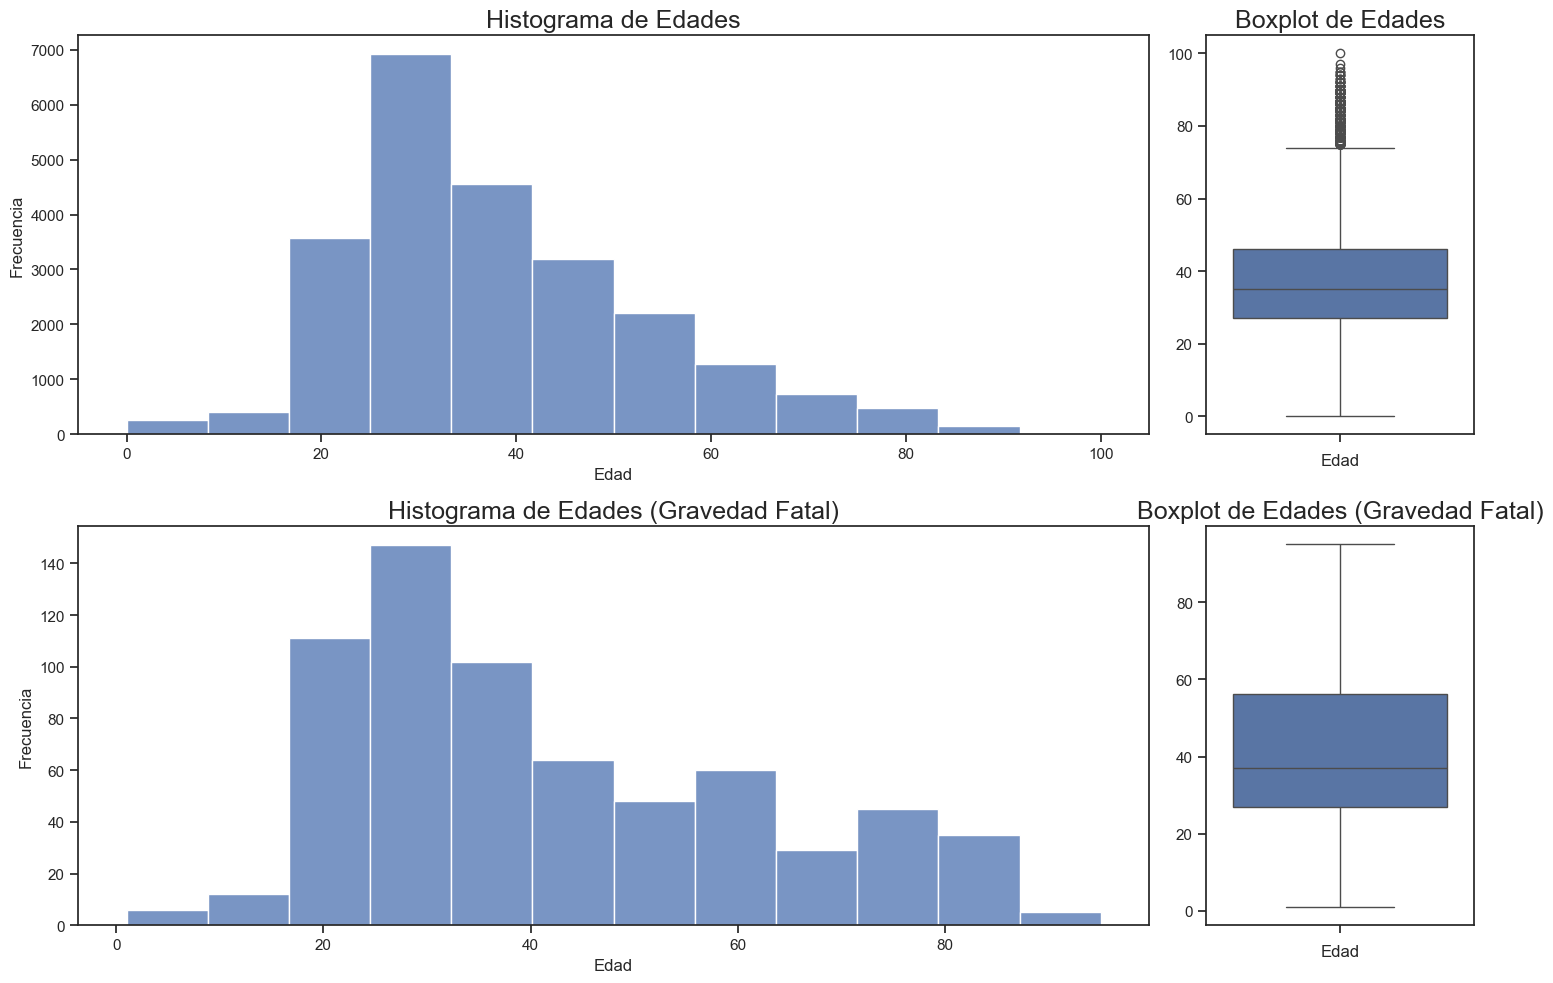

In [21]:
### Crear subconjuntos de datos ###
datos_totales = victimas
gravedad_fatal = victimas[victimas['gravedad'] == 'fatal']

### Configurar estilo ###
sns.set(style="ticks")


### Crear subgráficos 2x2 con anchos relativos ###
fig, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'width_ratios': [8, 2]})

### Histograma de todas las edades ###
sns.histplot(data=datos_totales, x='edad_victima', ax=axs[0, 0],bins= 12)
axs[0, 0].set_title('Histograma de Edades',fontsize=18)
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Frecuencia')

### Boxplot de todas las edades (vertical) ###
sns.boxplot(data=datos_totales, y='edad_victima', ax=axs[0, 1])
axs[0, 1].set_title('Boxplot de Edades',fontsize=18)
axs[0, 1].set_xlabel('Edad')
axs[0, 1].set_ylabel('')

### Histograma de edades con gravedad fatal ###
sns.histplot(data=gravedad_fatal, x='edad_victima', ax=axs[1, 0],bins= 12)
axs[1, 0].set_title('Histograma de Edades (Gravedad Fatal)',fontsize=18)
axs[1, 0].set_xlabel('Edad')
axs[1, 0].set_ylabel('Frecuencia')

### Boxplot de edades con gravedad fatal (vertical) ###
sns.boxplot(data=gravedad_fatal, y='edad_victima', ax=axs[1, 1])
axs[1, 1].set_title('Boxplot de Edades (Gravedad Fatal)',fontsize=18)
axs[1, 1].set_xlabel('Edad')
axs[1, 1].set_ylabel('')

### Ajustar el diseño y mostrar el gráfico ###
plt.tight_layout()
plt.show()

Al examinar los histogramas de las edades en accidentes fatales y no fatales, se nota una similitud considerable en sus distribuciones. No obstante, al revisar el boxplot que abarca todos los datos, identificamos la presencia de valores atípicos, los cuales no están presentes en los accidentes de gravedad fatal. Las medianas en ambos casos son similares, indicando una tendencia central comparable.

Adicionalmente, es importante señalar que la cantidad de datos relacionados con accidentes no fatales es significativamente mayor que la cantidad de accidentes fatales.

## Graficando con Barras

### 1- Grafico de tipo de calle

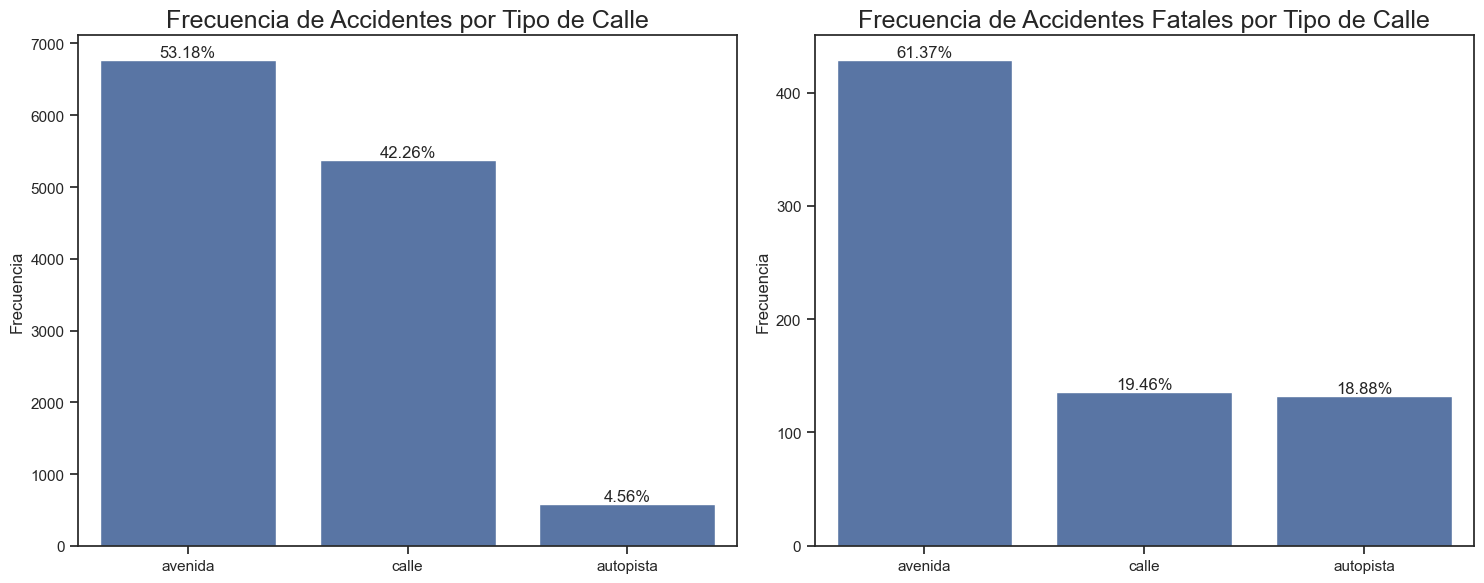

In [22]:
### Configuro el estilo ###
sns.set(style="ticks")

### Creo subgráficos ###
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

### Gráfico de barras para los accidentes no fatal, ordenado de mayor a menor ###
sns.countplot(x='tipo_calle', data=registro[registro['gravedad'] != 'fatal'], order=registro['tipo_calle'].value_counts().index, ax=axs[0])
axs[0].set_title('Frecuencia de Accidentes por Tipo de Calle', fontsize=18)
axs[0].set_xlabel('')
axs[0].set_ylabel('Frecuencia')

### Agrego etiquetas de porcentaje en cada barra en el primer gráfico ###
total_todos = len(registro[registro['gravedad'] != 'fatal'].dropna(subset=['tipo_calle']))
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total_todos:.2%}', ha="center", va="bottom", fontsize=12)  # Aumentar el tamaño de la fuente

### Gráfico de barras filtrando por gravedad fatal y ordenado de mayor a menor ###
sns.countplot(x='tipo_calle', data=registro[registro['gravedad'] == 'fatal'], order=registro['tipo_calle'].value_counts().index, ax=axs[1])

### Agrego etiquetas de porcentaje en cada barra en el segundo gráfico ###
total_fatal = len(registro[registro['gravedad'] == 'fatal'])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total_fatal:.2%}', ha="center", va="bottom", fontsize=12)  # Aumentar el tamaño de la fuente

axs[1].set_title('Frecuencia de Accidentes Fatales por Tipo de Calle', fontsize=18)
axs[1].set_xlabel('')
axs[1].set_ylabel('Frecuencia')

### Ajusto el diseño y muestro el gráfico ###
plt.tight_layout()
plt.show()

La mayor parte de los accidentes, ya sean fatales o no fatales, ocurre principalmente en avenidas, seguidas por calles y autopistas en menor medida. En los accidentes fatales, las avenidas destacan de manera significativa, representando el 61% de los casos. Las proporciones entre avenidas y autopistas son prácticamente equivalentes en este contexto. En cambio, en los accidentes no fatales, las avenidas aún mantienen la mayoría, con aproximadamente el 53.18%, seguidas por calles con un 42.26% y autopistas con un 4.56%.

### Gráfico de Barras de accidentes por comuna

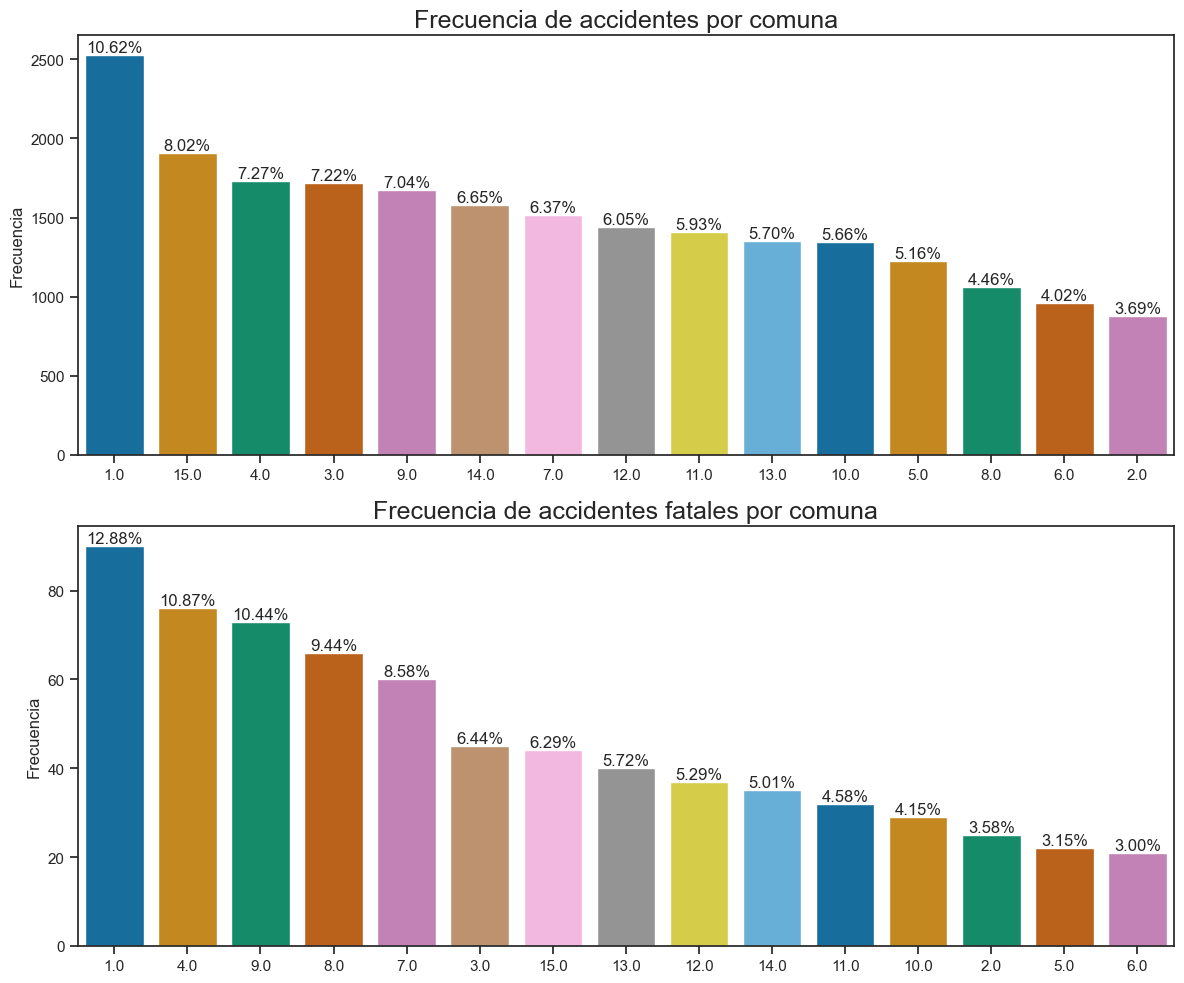

In [24]:
### Configuro el estilo ###
sns.set(style="ticks")

### Creo los subgráficos ###
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

### Gráfico de barras para gravedad distinta de "fatal" ###
sns.countplot(x='comuna', data=registro[registro['gravedad'] != 'fatal'], order=registro['comuna'].value_counts().index, ax=axs[0] ,palette='colorblind')
axs[0].set_title('Frecuencia de accidentes por comuna',fontsize=18)
axs[0].set_xlabel('') 
axs[0].set_ylabel('Frecuencia')

### Agrego las etiquetas de porcentaje en cada barra en el primer gráfico ###
total_todos = len(registro[registro['gravedad'] != 'fatal'])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total_todos:.2%}', ha="center", va="bottom", fontsize=12) 

### Gráfico de barras para gravedad "fatal" ###
sns.countplot(x='comuna', data=registro[registro['gravedad'] == 'fatal'], order=registro[registro['gravedad'] == 'fatal']['comuna'].value_counts().index, ax=axs[1], palette='colorblind') 
axs[1].set_title('Frecuencia de accidentes fatales por comuna',fontsize=18)
axs[1].set_xlabel('')
axs[1].set_ylabel('Frecuencia')

### Agrego las etiquetas de porcentaje en cada barra en el segundo gráfico ###
total_fatal = len(registro[registro['gravedad'] == 'fatal'])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total_fatal:.2%}', ha="center", va="bottom", fontsize=12) 

### Ajusto el diseño y muestro el gráfico ###
plt.tight_layout()
plt.show()

En el gráfico de barras superior, que muestra la distribución de accidentes no fatales por comuna, se destaca que la mayor parte de estos incidentes ocurren principalmente en las comunas 1, 15 y 4. En cambio, en la representación inferior, que corresponde a los accidentes fatales, se nota que las comunas más afectadas son la 1, 4 y 9.